## Brief Data Description

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')

df = pd.read_csv('diamonds.csv')
print(df.shape)
df.head()

(53940, 10)


,Carat(Weight of Daimond),Cut(Quality),Color,Clarity,Depth,Table,Price(in US dollars),X(length),Y(width),Z(Depth)
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [2]:
## rename columns

df = df.rename(columns={'Carat(Weight of Daimond)': 'carat',
                        'Cut(Quality)': 'cut',
                        'Price(in US dollars)': 'price',
                       'X(length)': 'x',
                       'Y(width)': 'y',
                       'Z(Depth)': 'z'})

 1. Carat(Weight of Diamond) -> Weight of Diamond.
 2. Cut(Quality) -> Quality of cut(Fair, Good, Very Good, Premium, Ideal).
 3. Color -> Diamond Color(from J -> 'worst' to D -> 'Best').
 4. Clarity -> Measurement of Transparency(how clear the Diamond is) 
                  Sequence of clarity ( I1 (worst quality), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(best quality) ).
 5. Table -> Width of top of a Diamond.
 6. Price(in US dollars) -> Price of Diamond in US dollars.
 7. X(length) -> Length of Diamond in mm. 
 8. Y(width) -> Width of Diamond in mm. 
 9. Z(depth) -> Depth of Diamond in mm.
10. Depth -> Total depth percentage. It can calculated by a simple formula.
                  Total Depth % = z / mean(x , y) or z * 2 / (x + y). 

In [3]:
## no missings

df.isna().sum()

carat      0
cut        0
Color      0
Clarity    0
Depth      0
Table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
df.dtypes

carat      float64
cut         object
Color       object
Clarity     object
Depth      float64
Table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

все типы в норме

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   Color    53940 non-null  object 
 3   Clarity  53940 non-null  object 
 4   Depth    53940 non-null  float64
 5   Table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## Корреляция

In [6]:
abs(df.corr()['price']).sort_values(ascending=False)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
Table    0.127134
Depth    0.010647
Name: price, dtype: float64

In [7]:
## наибольшая корреляция с таргетом у признаков carat, x, y и z, что вполне закономерно,
## чем больше карат или размер алмаза, тем больше его стоиомть

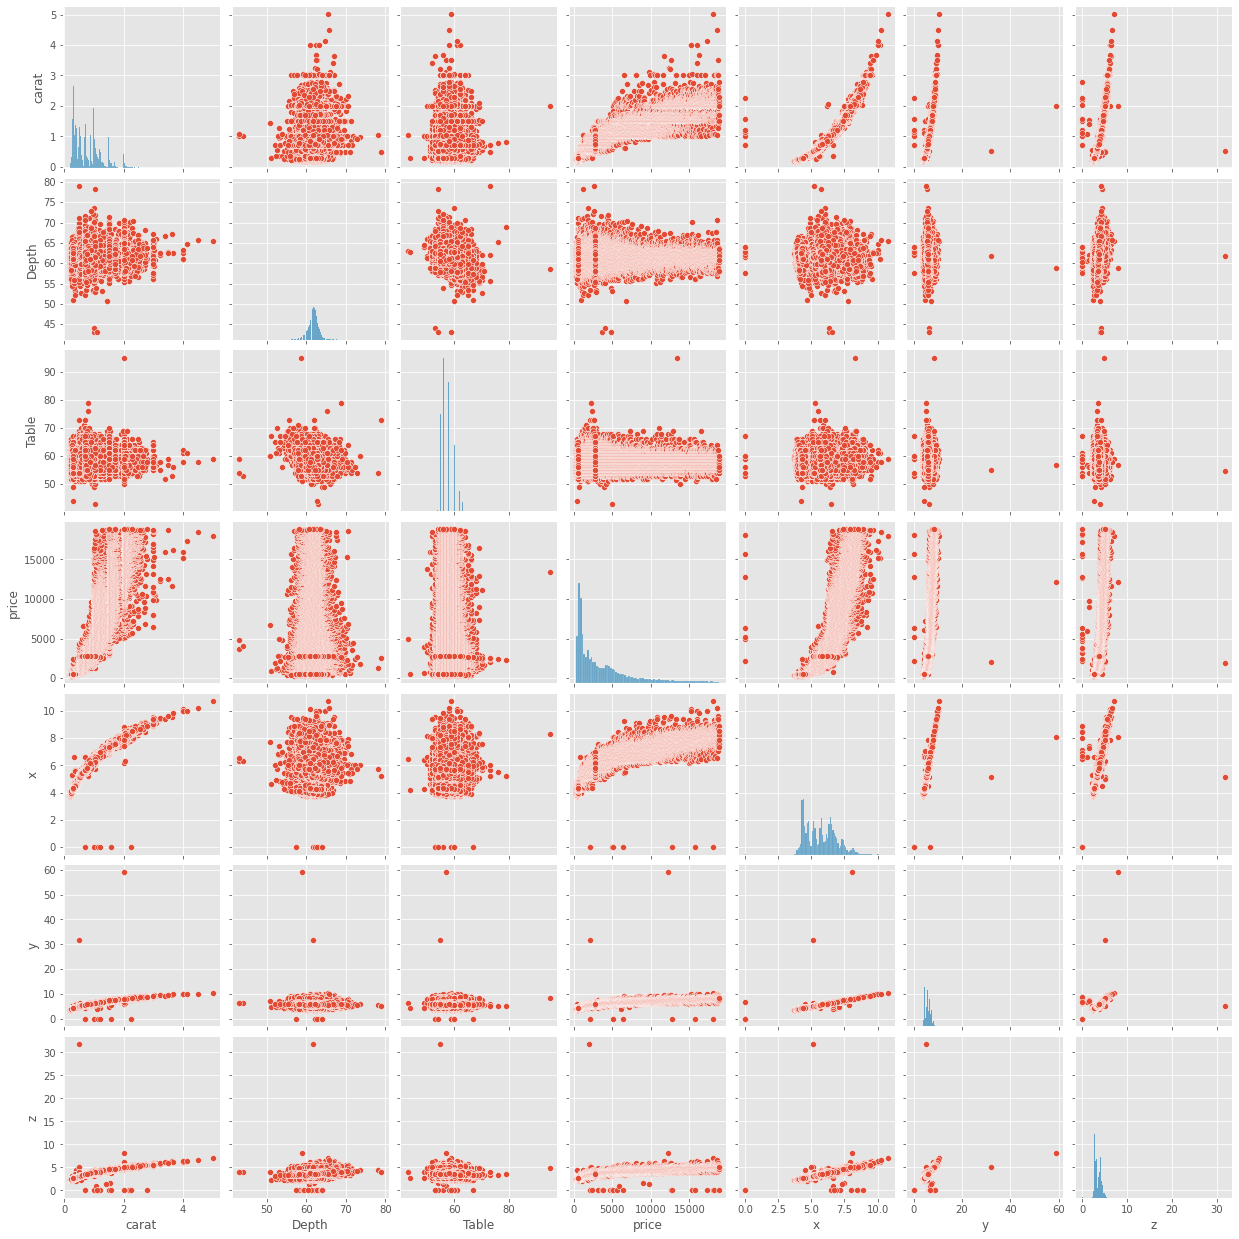

In [8]:
sns.pairplot(df)

In [9]:
## графики подтверждают наблюдения выше

## Data Visualization

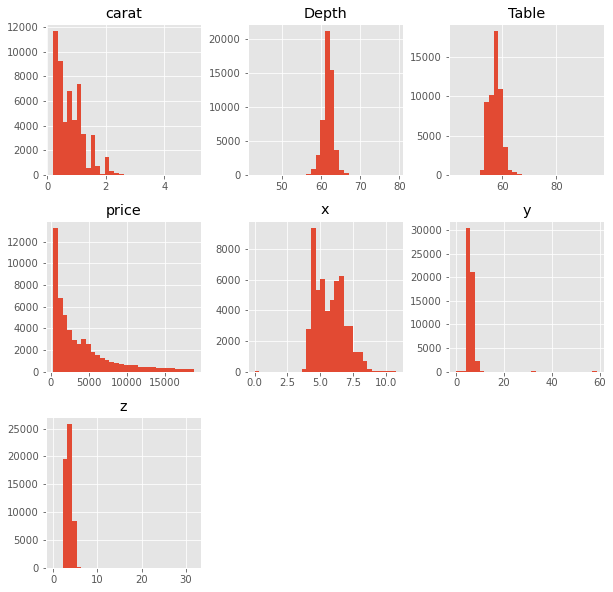

In [10]:
df.select_dtypes('number').hist(bins=30, figsize=(10, 10));

<AxesSubplot:xlabel='Color'>

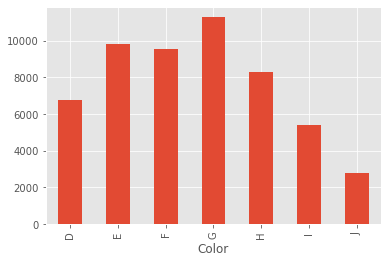

In [11]:
## можно заметить, что алмазов с цветами J и D(наихудшие и наилучшие) меньше всего

df.groupby('Color').count()['carat'].plot.bar()

<AxesSubplot:xlabel='Clarity'>

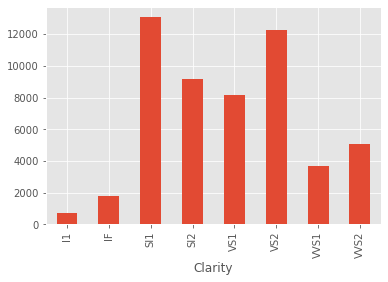

In [12]:
## Аналогичная ситуация и с мерой чистоты алмаза I1 и IF наименьшее

df.groupby('Clarity').count()['carat'].plot.bar()

In [13]:
df.select_dtypes('float64').columns

Index(['carat', 'Depth', 'Table', 'x', 'y', 'z'], dtype='object')

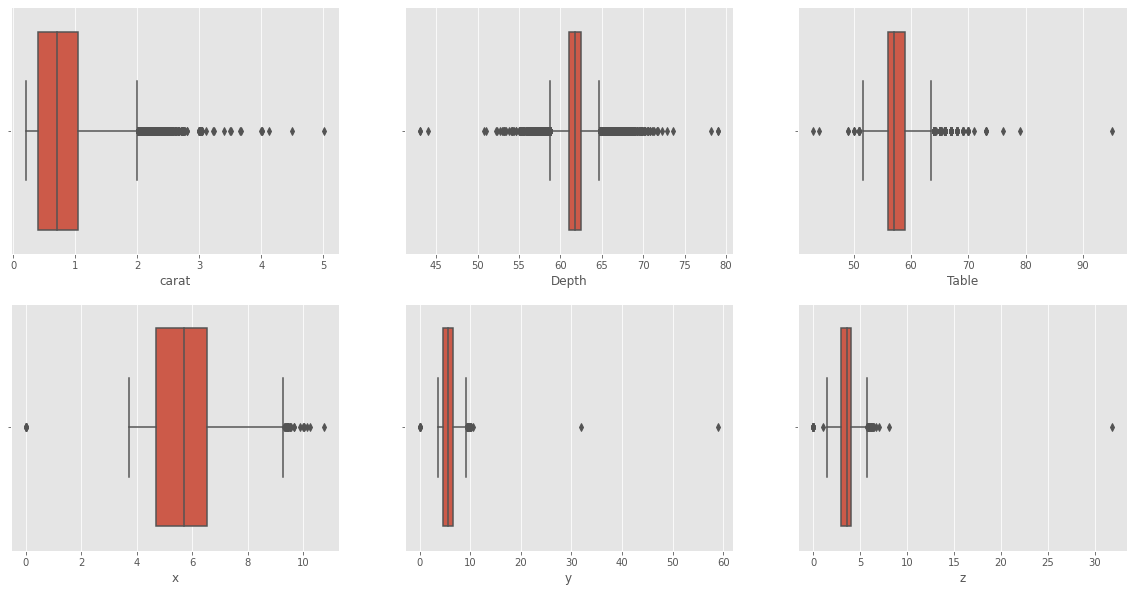

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

for i, col in enumerate(df.select_dtypes('float64').columns):
    sns.boxplot(df[col], ax=axs[i // 3][i % 3])

In [15]:
## можно заметить что выбросы присутствуют в каждой колонке

## Hypothesis

In [16]:
from scipy import stats as st

In [17]:
df

,carat,cut,Color,Clarity,Depth,Table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


Проверка гипотезы: средние цены камней с цветами F и H одинаковы

alpha=0.05

In [18]:
x1 = df[df['Color'] == 'F']
x2 = df[df['Color'] == 'H']


In [19]:
results = st.ttest_ind(x1['price'].values, x2['price'].values, nan_policy='omit')
results

Ttest_indResult(statistic=-12.717698041559935, pvalue=6.81861206715393e-37)

p-val < 0.05, значит отвергаем нулевую гипотезу

Проверка гипотезы: средние цены камней с чистотой алмаза SI1 и VS2 одинаковы

alpha=0.05

In [20]:
x1 = df[df['Clarity'] == 'SI2']
x2 = df[df['Clarity'] == 'VS2']


In [21]:
results = st.ttest_ind(x1['price'].values, x2['price'].values, nan_policy='omit')
results

Ttest_indResult(statistic=19.937834655112283, pvalue=1.1898402626107694e-87)

p-val < 0.05, значит отвергаем нулевую гипотезу

## Linear Regression

In [22]:
import statsmodels.api as sm

In [23]:
X = df['carat']
y = df['price']
X_constant = sm.add_constant(X)

mod = sm.OLS(y, X_constant)
res_simple = mod.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 3.041e+05
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:17:54   Log-Likelihood:            -4.7273e+05
No. Observations:               53940   AIC:                         9.455e+05
Df Residuals:                   53938   BIC:                         9.455e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2256.3606     13.055   -172.830      0.0

p-val < 0.05, значит carat влияет на price

In [27]:
X = df['x']
y = df['price']
X_constant = sm.add_constant(X)

mod = sm.OLS(y, X_constant)
res_simple = mod.fit()
print(res_simple.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                 1.937e+05
Date:                Fri, 09 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:19:53   Log-Likelihood:            -4.8267e+05
No. Observations:               53940   AIC:                         9.653e+05
Df Residuals:                   53938   BIC:                         9.654e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.409e+04     41.732   -337.724      0.0

p-val < 0.05, значит x влияет на price

## Logistic Regression

In [44]:
from sklearn.preprocessing import LabelEncoder

In [47]:
enc = LabelEncoder()
df['cut_cat'] = enc.fit_transform(df['cut'])

In [40]:
df['price_cat'] = 1
df.loc[df['price'] < df['price'].mean(), 'price_cat'] = 0

In [51]:
X = df['carat']
y = df['price_cat']
X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
print(logit.summary())


Optimization terminated successfully.
         Current function value: 0.131063
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:              price_cat   No. Observations:                53940
Model:                          Logit   Df Residuals:                    53938
Method:                           MLE   Df Model:                            1
Date:                Fri, 09 Dec 2022   Pseudo R-squ.:                  0.8002
Time:                        19:50:24   Log-Likelihood:                -7069.5
converged:                       True   LL-Null:                       -35380.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -14.7437      0.179    -82.421      0.000     -15.094     -14.393
carat         16.0827      0

In [53]:
import numpy as np
## отношение шансов при carat

print(np.exp(16.0827))

9652234.4911708


In [ ]:
## стат значимыцй признак для price